In [ ]:
##First we clone the yolov5 directory

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14615, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 14615 (delta 109), reused 151 (delta 98), pack-reused 14446
Receiving objects: 100% (14615/14615), 13.56 MiB | 19.17 MiB/s, done.
Resolving deltas: 100% (10086/10086), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [3]:
!cd yolov5 && pip install -r requirements.txt

In [2]:
import torch
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [7]:
model = torch.hub.load('ultralytics/yolov5','yolov5x')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-7 Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro P4000, 8120MiB)



  0%|          | 0.00/166M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5x summary: 444 layers, 86705005 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

NameError: name 'model' is not defined

In [22]:
#img = 'https://ultralytics.com/images/zidane.jpg'
img = 'https://gdb.voanews.com/3F12BCA8-1CC1-4726-AF44-3F117A542B9F_cx0_cy9_cw0_w1023_r1_s.jpg'

In [23]:
results=model(img)
results.print()

image 1/1: 575x1023 11 persons, 18 cars, 4 motorcycles, 8 buss
Speed: 901.9ms pre-process, 69.5ms inference, 2.5ms NMS per image at shape (1, 3, 384, 640)


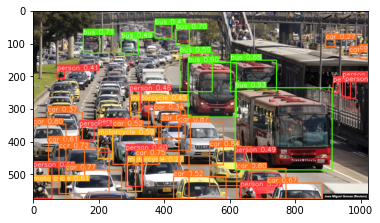

In [24]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [25]:
np.squeeze(results.render()).shape

(575, 1023, 3)

In [5]:
import uuid
import os
import time

In [ ]:
IMAGES_PATH=os.path.join('data','images')
labels=['aircraft']
number_imgs = 

In [1]:
!cd yolov5 && python train.py --img 640 --batch 1 --epochs 500 --data custom.yaml --weights yolov5x.pt

train: weights=yolov5x.pt, cfg=, data=custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: YOLOv5 requirement "thop>=0.1.1" not found, attempting AutoUpdate...

requirements: 1 package updated per /notebooks/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.2-228-g6ae3dff Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro P4000, 8120MiB)

hyperparameters: lr0=0.0

In [8]:
model = torch.hub.load('ultralytics/yolov5','custom',path='yolov5/runs/train/exp2/weights/best.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\akhvatsa/.cache\torch\hub\master.zip
YOLOv5  2022-11-30 Python-3.9.15 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 322 layers, 86180143 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 80, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1

In [6]:
img = os.path.join('data','images','03f84930-e2be-4c19-9afc-0dc26d02538e.jpg')

In [9]:
results = model (img)

In [10]:
results.print()

image 1/1: 2560x2560 27 aircrafts
Speed: 261.6ms pre-process, 3762.2ms inference, 70.9ms NMS per image at shape (1, 3, 640, 640)


In [ ]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [4,4]
plt.imshow(np.squeeze(results.render()))

plt.show()